## You may ignore this part

In [1]:
import sys
sys.executable

'c:\\users\\msi1\\desktop\\data science projects\\speech emotions\\speechrecognition36\\scripts\\python.exe'

In [3]:
from keras import regularizers

Using TensorFlow backend.


In [4]:
import os
audioFiles= os.listdir('data/')

In [5]:
type(audioFiles)

list

In [6]:
print(audioFiles[18])

03-01-01-01-01-01-19.wav


In [7]:
print(audioFiles[20][6:-16])

01


In [8]:
len(audioFiles)

1440

## Plotting differrent Audio files

In [9]:
import librosa
# librosa.load?

In [10]:
# Returns
# -------
# y    : np.ndarray [shape=(n,) or (2, n)]
#     audio time series

# sr   : number > 0 [scalar]
#     sampling rate of ``y``
## sampling 22050 rate is comman, data array is variable

data, sampling_rate = librosa.load('data/03-01-03-02-02-01-02.wav')

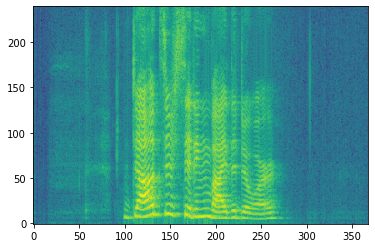

In [11]:
import matplotlib.pyplot as plt
import scipy.io.wavfile
import numpy as np
import sys


sr,x = scipy.io.wavfile.read('data/03-01-03-02-02-01-02.wav')

## Parameters: 10ms step, 30ms window
nstep = int(sr * 0.01)
nwin  = int(sr * 0.03)
nfft = nwin

window = np.hamming(nwin)

## will take windows x[n1:n2].  generate
## and loop over n2 such that all frames
## fit within the waveform
nn = range(nwin, len(x), nstep)

X = np.zeros( (len(nn), nfft//2) )

for i,n in enumerate(nn):
    xseg = x[n-nwin:n]
    z = np.fft.fft(window * xseg, nfft)
    X[i,:] = np.log(np.abs(z[:nfft//2]))

plt.imshow(X.T, interpolation='nearest',
    origin='lower',
    aspect='auto')

plt.show()

## Setting the labels

In [12]:
import os
audioFiles= os.listdir('data/')
## skipping neutral voice 01 wale
sentiments =[]
for file in audioFiles:
    if file[:1]=='a':
        sentiments.append('angry_male')
    elif file[:1]=='f':
        sentiments.append('fearful_male')
    elif file[:1]=='h':
        sentiments.append('happy_male')
    elif file[:2]=='sa':
        sentiments.append('sad_male')
    elif file[6:8]=='02' and int(file[18:20])%2==0:
        sentiments.append('calm_female')
    elif file[6:8]=='02' and int(file[18:20])%2==1:
        sentiments.append('calm_male')
    elif file[6:8]=='03' and int(file[18:20])%2==0:
        sentiments.append('happy_female')
    elif file[6:8]=='03' and int(file[18:20])%2==1:
        sentiments.append('happy_male')
    elif file[6:8]=='04' and int(file[18:20])%2==0:
        sentiments.append('sad_female')
    elif file[6:8]=='04' and int(file[18:20])%2==1:
        sentiments.append('sad_male')
    elif file[6:8]=='05' and int(file[18:20])%2==0:
        sentiments.append('angry_female')
    elif file[6:8]=='05' and int(file[18:20])%2==1:
        sentiments.append('angry_male')
    elif file[6:8]=='06' and int(file[18:20])%2==0:
        sentiments.append('fearful_female')
    elif file[6:8]=='06' and int(file[18:20])%2==1:
        sentiments.append('fearful_male')

    

In [13]:
all_sentiments = set(sentiments)
all_sentiments

{'angry_female',
 'angry_male',
 'calm_female',
 'calm_male',
 'fearful_female',
 'fearful_male',
 'happy_female',
 'happy_male',
 'sad_female',
 'sad_male'}

In [14]:
import pandas as pd
labels = pd.DataFrame(sentiments)

In [15]:
len(labels)

960

## Extract features with mfcc function (fourier transformation)

In [16]:
# librosa.load?

In [17]:
# librosa.feature.mfcc?

In [18]:
audioFiles[0]

'03-01-01-01-01-01-01.wav'

In [19]:
## 
df = pd.DataFrame(columns=['feature'])
bookmark=0
for index,y in enumerate(audioFiles):
    if y[6:-16]!='01' and y[6:-16]!='07' and y[6:-16]!='08' and y[:2]!='su' and y[:1]!='n' and y[:1]!='d':
        X, sample_rate = librosa.load('data/'+y, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                            sr=sample_rate, 
                                            n_mfcc=13),axis=0)
        feature = mfccs
        df.loc[bookmark] = [feature]
        bookmark=bookmark+1        

In [20]:
feature_df = pd.DataFrame(df['feature'].values.tolist())

In [21]:
newdf = pd.concat([feature_df,labels], axis=1)

In [22]:
newdf = newdf.rename(index=str, columns={"0": "label"})

In [23]:
newdf[:5]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
0,-70.269081,-70.269081,-70.269081,-70.269081,-70.269081,-70.269081,-70.269081,-70.269081,-70.269081,-70.269081,...,-57.606026,-59.165623,-58.309124,-56.908752,-59.104012,-62.528481,-62.309921,-61.065742,-60.911045,calm_male
1,-65.707954,-65.707954,-63.580608,-61.419411,-59.960712,-63.011276,-63.900513,-56.068394,-54.799675,-54.788815,...,-39.834072,-40.705566,-41.277607,-41.391945,-43.967670,-49.544460,-50.657040,-49.280472,-48.760681,calm_female
2,-65.483360,-65.483360,-65.483360,-65.483360,-65.483360,-65.483360,-65.483360,-65.483360,-65.483360,-65.483360,...,-31.934776,-34.849861,-36.426250,-36.479450,-37.743347,-40.266872,-41.793125,-41.500591,-40.949795,calm_male
3,-64.529472,-64.529472,-64.529472,-64.529472,-64.529472,-64.529472,-64.529472,-64.529472,-64.529472,-65.920654,...,-48.780212,-48.577007,-47.649605,-42.966824,-42.567753,-43.183723,-44.057907,-43.637939,-44.574593,calm_female
4,-61.001278,-58.799526,-60.931210,-67.416855,-72.383270,-64.842598,-61.867981,-64.517372,-60.647495,-58.380913,...,-39.386536,-42.110699,-41.020596,-38.441113,-36.532555,-37.991196,-40.078472,-43.429203,-43.876236,calm_male


In [24]:
from sklearn.utils import shuffle
newdf = shuffle(newdf)
newdf=newdf.fillna(0)
newdf[:10]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
866,-22.559587,-23.969160,-24.633593,-22.806765,-20.978468,-19.504332,-19.492485,-23.697300,-25.579746,-23.580904,...,-30.373962,-31.367647,-31.325657,-33.634598,-32.323433,-31.643009,-34.563618,-39.398155,-41.542812,fearful_male
856,-45.581219,-45.273746,-43.913551,-43.634834,-44.598206,-43.964626,-43.601925,-44.093609,-43.985374,-42.884922,...,-40.462479,-40.525627,-40.440594,-41.485031,-42.769047,-41.826431,-41.069981,-40.644497,-41.983803,fearful_male
532,-62.433018,-65.309578,-64.596283,-62.672451,-60.128269,-59.109917,-58.908005,-60.336861,-61.260586,-59.862698,...,-59.914875,-62.112003,-59.720127,-59.613216,-59.208427,-60.416832,-63.684074,-58.551144,-56.663765,sad_male
78,-64.429466,-64.145622,-65.024506,-65.927078,-67.880775,-69.561821,-69.398331,-69.880341,-71.064201,-71.179733,...,-51.563713,-52.763794,-51.323936,-50.735516,-53.308025,-56.856712,-55.277363,-53.253609,-53.142464,calm_male
802,-53.420773,-53.249249,-53.770725,-54.073311,-55.262028,-52.536160,-52.183079,-51.647076,-52.171181,-54.541077,...,-50.023045,-48.987625,-49.351578,-48.049385,-49.748192,-50.699577,-49.915871,-52.909710,-55.884964,fearful_male
21,-61.710556,-61.729427,-63.511398,-61.335854,-59.166283,-58.005363,-57.793800,-58.130497,-59.078838,-60.568584,...,-59.319355,-58.727825,-61.347031,-67.288254,-64.778496,-59.085732,-56.324848,-58.306534,-63.066528,calm_female
107,-67.372902,-67.372902,-67.372902,-67.372902,-67.372902,-67.372902,-67.372902,-65.378906,-62.060684,-61.194523,...,-39.308491,-36.742298,-36.664925,-36.280907,-36.344814,-36.454308,-37.267391,-31.720961,-27.801929,calm_female
904,-44.836853,-45.227745,-44.678612,-45.577194,-44.421486,-43.888550,-44.627522,-43.944233,-45.461418,-45.919819,...,-37.554665,-39.361748,-40.381142,-37.511082,-36.476978,-36.394913,-36.682835,-36.279789,-35.985291,fearful_male
768,-45.254734,-46.807640,-47.835258,-45.650845,-45.076557,-47.986069,-48.729069,-48.730862,-49.259968,-49.091854,...,-57.199688,-54.128441,-53.303104,-59.324028,-57.478168,-58.636284,-59.552689,-60.011997,-60.011997,fearful_male
350,-47.188889,-44.124416,-44.510780,-47.331566,-50.294590,-49.778957,-48.494583,-44.857243,-43.351547,-44.223404,...,-35.306927,-38.280010,-39.442745,-38.546494,-38.845860,-39.169743,-40.838200,-41.737785,-41.991379,happy_male


## Dividing the data into test and train

In [25]:
newdf1 = np.random.rand(len(newdf)) < 0.8
train = newdf[newdf1]
test = newdf[~newdf1]

In [26]:
trainfeatures = train.iloc[:, :-1]
trainlabel = train.iloc[:, -1:]
testfeatures = test.iloc[:, :-1]
testlabel = test.iloc[:, -1:]

In [27]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)

lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))


c:\users\msi1\desktop\data science projects\speech emotions\speechrecognition36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


## Expanding dimension for CNN model

In [28]:
# np.expand_dims?

In [29]:
X_test.shape

(186, 216)

In [30]:

x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)

In [31]:
x_testcnn.shape

(186, 216, 1)

In [32]:
import keras
# from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
# from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
# from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
# from keras.models import Model
# from keras.callbacks import ModelCheckpoint
# from sklearn.metrics import confusion_matrix

In [33]:
model = Sequential()

model.add(Conv1D(256, 5,padding='same',
                 input_shape=(216,1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 216, 256)          1536      
_________________________________________________________________
activation_1 (Activation)    (None, 216, 256)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 216, 128)          163968    
_________________________________________________________________
activation_2 (Activation)    (None, 216, 128)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 216, 128)          0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 27, 128)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 27, 128)          

In [35]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

### Removed the whole training part for avoiding unnecessary long epochs list

In [36]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=250, validation_data=(x_testcnn, y_test))

Train on 774 samples, validate on 186 samples
Epoch 1/250
774/774 [==============================] - 4s 5ms/step - loss: 2.3641 - accuracy: 0.0995 - val_loss: 2.2838 - val_accuracy: 0.1613
Epoch 2/250
774/774 [==============================] - 1s 838us/step - loss: 2.2798 - accuracy: 0.1279 - val_loss: 2.2756 - val_accuracy: 0.1559
Epoch 3/250
774/774 [==============================] - 1s 823us/step - loss: 2.2520 - accuracy: 0.1434 - val_loss: 2.2562 - val_accuracy: 0.1559
Epoch 4/250
774/774 [==============================] - 1s 800us/step - loss: 2.2214 - accuracy: 0.1731 - val_loss: 2.2362 - val_accuracy: 0.1882
Epoch 5/250
774/774 [==============================] - 1s 792us/step - loss: 2.1983 - accuracy: 0.1705 - val_loss: 2.2070 - val_accuracy: 0.2366
Epoch 6/250
774/774 [==============================] - 1s 805us/step - loss: 2.1801 - accuracy: 0.1899 - val_loss: 2.1849 - val_accuracy: 0.2204
Epoch 7/250
774/774 [==============================] - 1s 814us/step - loss: 2.1531 - 

Epoch 57/250
774/774 [==============================] - 1s 814us/step - loss: 1.5145 - accuracy: 0.4276 - val_loss: 1.6248 - val_accuracy: 0.4194
Epoch 58/250
774/774 [==============================] - 1s 822us/step - loss: 1.5048 - accuracy: 0.4419 - val_loss: 1.6506 - val_accuracy: 0.3656
Epoch 59/250
774/774 [==============================] - 1s 823us/step - loss: 1.4981 - accuracy: 0.4483 - val_loss: 1.6396 - val_accuracy: 0.3602
Epoch 60/250
774/774 [==============================] - 1s 786us/step - loss: 1.4852 - accuracy: 0.4264 - val_loss: 1.6025 - val_accuracy: 0.4194
Epoch 61/250
774/774 [==============================] - 1s 835us/step - loss: 1.4828 - accuracy: 0.4406 - val_loss: 1.5850 - val_accuracy: 0.4140
Epoch 62/250
774/774 [==============================] - 1s 837us/step - loss: 1.4782 - accuracy: 0.4638 - val_loss: 1.6694 - val_accuracy: 0.3602
Epoch 63/250
774/774 [==============================] - 1s 800us/step - loss: 1.4689 - accuracy: 0.4561 - val_loss: 1.6172 -

774/774 [==============================] - 1s 805us/step - loss: 1.2287 - accuracy: 0.5349 - val_loss: 1.4501 - val_accuracy: 0.4409
Epoch 114/250
774/774 [==============================] - 1s 828us/step - loss: 1.2430 - accuracy: 0.5194 - val_loss: 1.4721 - val_accuracy: 0.4355
Epoch 115/250
774/774 [==============================] - 1s 817us/step - loss: 1.2279 - accuracy: 0.5284 - val_loss: 1.4419 - val_accuracy: 0.4570
Epoch 116/250
774/774 [==============================] - 1s 829us/step - loss: 1.2323 - accuracy: 0.5207 - val_loss: 1.4497 - val_accuracy: 0.4624
Epoch 117/250
774/774 [==============================] - 1s 837us/step - loss: 1.2176 - accuracy: 0.5439 - val_loss: 1.4407 - val_accuracy: 0.4731
Epoch 118/250
774/774 [==============================] - 1s 809us/step - loss: 1.2248 - accuracy: 0.5284 - val_loss: 1.4179 - val_accuracy: 0.4731
Epoch 119/250
774/774 [==============================] - 1s 807us/step - loss: 1.2128 - accuracy: 0.5310 - val_loss: 1.4591 - val_ac

Epoch 169/250
774/774 [==============================] - 1s 835us/step - loss: 1.0856 - accuracy: 0.6008 - val_loss: 1.5143 - val_accuracy: 0.4624
Epoch 170/250
774/774 [==============================] - 1s 850us/step - loss: 1.0791 - accuracy: 0.6111 - val_loss: 1.4674 - val_accuracy: 0.4301
Epoch 171/250
774/774 [==============================] - 1s 849us/step - loss: 1.0693 - accuracy: 0.6021 - val_loss: 1.5419 - val_accuracy: 0.4677
Epoch 172/250
774/774 [==============================] - 1s 828us/step - loss: 1.0748 - accuracy: 0.6189 - val_loss: 1.5461 - val_accuracy: 0.3978
Epoch 173/250
774/774 [==============================] - 1s 832us/step - loss: 1.0675 - accuracy: 0.6124 - val_loss: 1.4378 - val_accuracy: 0.4731
Epoch 174/250
774/774 [==============================] - 1s 853us/step - loss: 1.0692 - accuracy: 0.6059 - val_loss: 1.4220 - val_accuracy: 0.4946
Epoch 175/250
774/774 [==============================] - 1s 848us/step - loss: 1.0620 - accuracy: 0.5956 - val_loss: 1

Epoch 225/250
774/774 [==============================] - 1s 797us/step - loss: 0.9501 - accuracy: 0.6421 - val_loss: 1.4427 - val_accuracy: 0.4624
Epoch 226/250
774/774 [==============================] - 1s 814us/step - loss: 0.9469 - accuracy: 0.6641 - val_loss: 1.4207 - val_accuracy: 0.4677
Epoch 227/250
774/774 [==============================] - 1s 805us/step - loss: 0.9405 - accuracy: 0.6576 - val_loss: 1.4539 - val_accuracy: 0.4731
Epoch 228/250
774/774 [==============================] - 1s 835us/step - loss: 0.9356 - accuracy: 0.6525 - val_loss: 1.4368 - val_accuracy: 0.4731
Epoch 229/250
774/774 [==============================] - 1s 826us/step - loss: 0.9366 - accuracy: 0.6563 - val_loss: 1.4556 - val_accuracy: 0.4409
Epoch 230/250
774/774 [==============================] - 1s 828us/step - loss: 0.9347 - accuracy: 0.6615 - val_loss: 1.4313 - val_accuracy: 0.5108
Epoch 231/250
774/774 [==============================] - 1s 826us/step - loss: 0.9437 - accuracy: 0.6654 - val_loss: 1

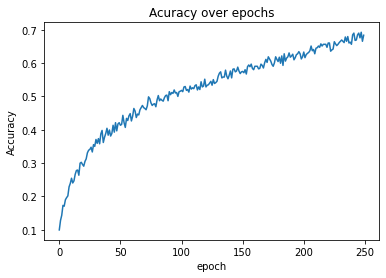

In [45]:
plt.plot(cnnhistory.history['accuracy'])
plt.title('Acuracy over epochs')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
plt.show()

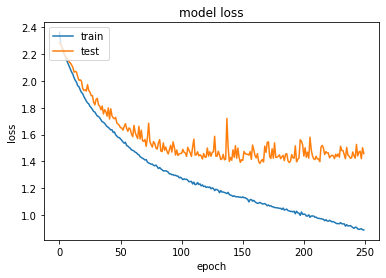

In [37]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Save and Load the model

In [43]:
# model.save('models/model.h5')

In [68]:
# from keras.models import load_model
# loaded_model = load_model('models/model.h5', compile=False)

# model = load_model

## Testing the model

In [118]:
preds = model.predict(x_testcnn, 
                         batch_size=16, 
                         verbose=1)

186/186 [==============================] - 0s 388us/step


In [119]:
preds=preds.argmax(axis=1)
pred_int = preds.astype(int).flatten()
predictions = (lb.inverse_transform((pred_int)))

In [120]:
actual=y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actualvalues = (lb.inverse_transform((actual)))

In [121]:
from sklearn.metrics import confusion_matrix
confusion_matrix(actualvalues, predictions)


array([[ 7,  1,  1,  0,  3,  0,  3,  1,  0,  0],
       [ 1,  8,  0,  1,  0,  0,  0,  1,  0,  1],
       [ 0,  0, 24,  0,  0,  0,  1,  0,  1,  0],
       [ 0,  0,  0, 14,  0,  0,  0,  0,  1,  3],
       [ 0,  0,  3,  0, 10,  0,  3,  0,  2,  0],
       [ 1,  1,  1,  1,  0,  7,  0,  1,  1,  2],
       [ 0,  0,  7,  1,  2,  1,  6,  0,  2,  0],
       [ 2,  3,  0,  8,  0,  3,  1,  3,  0,  4],
       [ 0,  0, 10,  0,  1,  0,  0,  0,  4,  0],
       [ 1,  0,  2,  7,  0,  2,  1,  2,  0,  8]], dtype=int64)

<!-- Refine next code -->

# Recording voice

In [122]:
import pyaudio
import wave


## Prefered setence to say
kids are playing by the door

In [179]:
CHUNK = 1024 
FORMAT = pyaudio.paInt16 #paInt8
CHANNELS = 2 
RATE = 44100 #sample rate
RECORD_SECONDS = 4

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK) #buffer

print("Please speack something")
frames = []
for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data) # 2 bytes(16 bits) per channel

    
    
print("Done recording")
stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open("SavedRecording.wav", 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

Please speack something
Done recording


## Recorded Prediction

In [188]:
## for testing you may use my own recorded voice
# X, sample_rate = librosa.load('Omkars sad voice for prediction.wav', res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)

X, sample_rate = librosa.load('SavedRecording.wav', res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
featurelive = mfccs
livedf2 = featurelive

In [189]:
livedf2= pd.DataFrame(data=livedf2)

In [190]:
livedf2 = livedf2.stack().to_frame().T

In [191]:
twodim= np.expand_dims(livedf2, axis=2)

In [192]:
livepreds = model.predict(twodim, 
                         batch_size=32, 
                         verbose=1)

1/1 [==============================] - 0s 25ms/step


In [193]:
livepreds1=livepreds.argmax(axis=1)
liveabc = livepreds1.astype(int).flatten()

In [194]:
livepredictions = (lb.inverse_transform((liveabc)))
voice_pred= livepredictions[0].split("_")

In [196]:
print("Gender - "+voice_pred[1].upper()+" , Emotions - "+voice_pred[0].upper())

Gender - MALE , Emotions - SAD
